
<h1 align="center"> Detector de Fraude en Transacciones Bancarias </h1>

<h2>Nombre: Luis Mario Lozoya Chairez
    Matrícula: A00833364
</h2>

<h2> Introducción </h2>
En este proyecto, implementaremos un modelo de aprendizaje profundo para detectar fraudes en transacciones bancarias. Para ello, realizaremos una serie de pasos que incluirán la exploración y limpieza de datos, el balanceo de las clases en el dataset, y el desarrollo de una arquitectura de red neuronal profunda que se ajuste a las características del conjunto de datos. 

<h2> Objetivos del Proyecto: </h2>
<ul>
    <li> Exploración y Limpieza de Datos: Realizar una exploración exhaustiva del dataset y ejecutar cualquier limpieza de datos necesaria.</li>
    <li> Implementación del Modelo: Diseñar y probar varias arquitecturas de redes neuronales profundas para lograr una alta precisión en la detección de fraudes.</li>
    <li> Ajuste de Parámetros: Comparar distintas configuraciones de parámetros e inicializaciones para obtener los mejores resultados.</li>
</li>
</ul>


# Detector de Fraude en Tarjetas de Crédito

Este proyecto se centra en la creación de un modelo de Deep Learning para la detección de fraudes en tarjetas de crédito. Utilizaremos un dataset desequilibrado donde la mayoría de las transacciones no son fraudulentas. El objetivo es implementar técnicas de muestreo y balanceo de clases para optimizar la precisión del modelo. Este notebook sigue un esquema detallado, cubriendo la exploración de datos, preprocesamiento, submuestreo y sobremuestreo, y análisis de modelos.

**Fuente del Dataset**: Kaggle - 'Credit Card Fraud Detection'.




## Exploración y Entendimiento del Conjunto de Datos

El primer paso será obtener una comprensión detallada del conjunto de datos utilizado en este proyecto. Este dataset contiene transacciones bancarias (anónimas y preprocesadas para proteger la privacidad), con un objetivo de clasificación para identificar si cada transacción es fraudulenta.

#### Detalles del Conjunto de Datos

- **Número de Columnas**: El dataset tiene 30 columnas, que representan características de cada transacción.
- **Instancias**: Contiene aproximadamente 284,807 transacciones.
- **Tipos de Datos**: Las columnas son en su mayoría numéricas y escaladas, lo que facilita el procesamiento en modelos de deep learning.

- **Procesamiento de Datos**: Se aplicarán técnicas de balanceo como SMOTE y NearMiss para mitigar el desequilibrio entre clases de "Fraude" y "No Fraude". Además la verificación de valores nulos, duplicados y la correcta normalización de los datos para asegurar que estén listos para el modelo.



## Exploración y Limpieza de Datos

En esta sección, examinaremos las características del dataset, como el número de columnas, instancias y tipos de datos. Los datos han sido preprocesados, con nombres de columnas anonimizados y características escaladas por razones de privacidad. Nos enfocaremos en comprender la distribución del dataset y aplicar técnicas de balanceo de clases para mejorar la precisión de nuestro modelo predictivo.

In [ ]:
!pip install seaborn
!pip install imbalanced-learn


## Desarrollo del Modelo de Deep Learning

En esta sección implementamos un modelo de Deep Learning con una estructura ajustada al problema de detección de fraudes. El modelo incluye capas densas que permiten capturar patrones en las características escaladas mediante técnicas avanzadas de inicialización y regularización. 

### Configuración del Modelo:
- **Inicialización de Parámetros**: Se utilizó la inicialización Xavier para mantener la variancia bajo control y evitar la saturación de las activaciones en las capas densas.
- **Optimizador**: Adam fue elegido por su adaptabilidad en el ajuste de tasas de aprendizaje, mejorando la convergencia en datasets desequilibrados como el nuestro.
- **Función de Activación**: ReLU fue utilizada en las capas ocultas por su efectividad en modelos de deep learning, mientras que la capa de salida utiliza la función sigmoide para predecir las probabilidades de fraude (1) o no fraude (0).

### Hiperparámetros y Justificación:
- **Número de Capas**: Se probaron configuraciones con 1 a 3 capas ocultas para optimizar el balance entre capacidad de modelado y complejidad computacional.
- **Neuronas por Capa**: El modelo final incluye 30 neuronas en la primera capa y 15 en la segunda, lo cual demostró un buen desempeño en precisión sin un aumento excesivo de sobreajuste.
- **Tamaño de Lote**: Se probaron lotes de tamaño 32, 64 y 128, siendo el tamaño 64 el que proporcionó el mejor balance entre estabilidad y tiempo de entrenamiento.
- **Tasa de Aprendizaje**: Una tasa de aprendizaje de 0.001 fue seleccionada tras pruebas, asegurando una convergencia gradual sin saltos bruscos en la pérdida.

En resumen, las configuraciones y pruebas exhaustivas de estos parámetros permitieron optimizar el rendimiento del modelo, obteniendo una precisión elevada en la clasificación de transacciones fraudulentas y no fraudulentas.

In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Bibliotecas clasificadoras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

# Otras bibliotecas
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Cargar los datos
df = pd.read_csv("C:/Users/MARIO/Desktop/Semana 7 RNN/Equipo5_DeepLearning/Proyecto de Deep Learning de Mario L/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [77]:
#No hay valores nulos
df.isnull().sum().max()

0

In [78]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [79]:
# Las clases están muy sesgadas, debemos resolver este problema más adelante.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


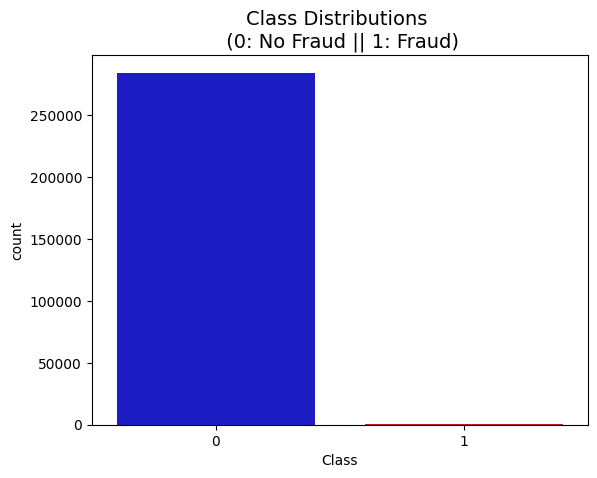

In [80]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


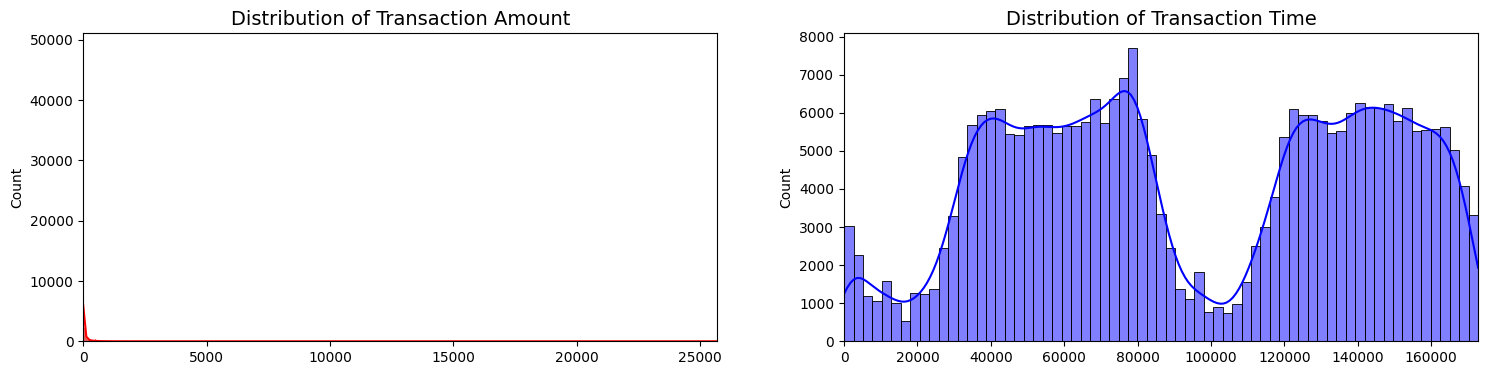

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


In [82]:
# Dado que la mayoría de nuestros datos ya han sido escalados, debemos escalar las columnas que quedan por escalar (Cantidad y Tiempo)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler es menos propenso a valores atípicos.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [83]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# ¡La cantidad y el tiempo están escalados!
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Ya tenemos X_train e y_train para los datos de submuestra, por eso estoy usando original para distinguir y no sobrescribir estas variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la distribución de las etiquetas


# Convertir en una matriz
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Verificar si la distribución de las etiquetas de prueba y de tren se distribuyen de manera similar
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [85]:
# Dado que nuestras clases están muy sesgadas, debemos hacerlas equivalentes para tener una distribución normal de las clases.

# Mezclemos los datos antes de crear las submuestras

df = df.sample(frac=1)

# cantidad de clases de fraude 492 filas.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Mezclar filas del marco de datos
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
108181,0.027947,-0.163230,-0.659398,-0.734066,2.223223,-2.431142,-1.363499,-0.702363,-0.892561,0.266470,...,-0.186063,-0.032567,0.142102,0.058300,0.449112,-0.359302,-0.420964,0.363497,0.190447,0
64329,1.089779,-0.394507,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,...,0.832398,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,1
238713,0.100328,0.764753,2.210899,-0.644720,-1.486227,-0.991175,-0.245007,-0.958694,-0.255364,-0.411714,...,0.109519,0.447488,1.303173,-0.012075,0.828615,0.266518,0.029602,-0.038689,-0.053669,0
8335,-0.293440,-0.864214,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,...,1.410678,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1
214662,1.376930,0.647035,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,...,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


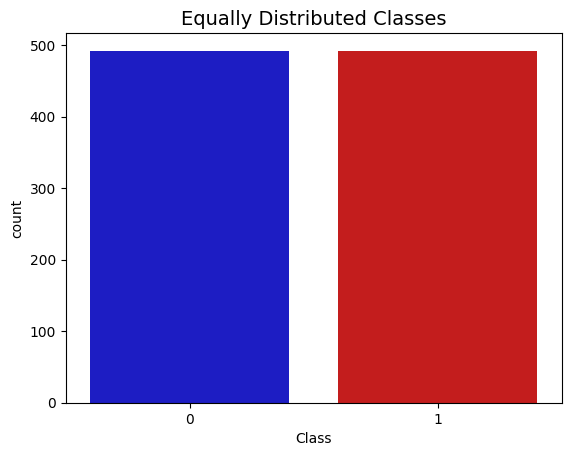

In [86]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts() / len(new_df))

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


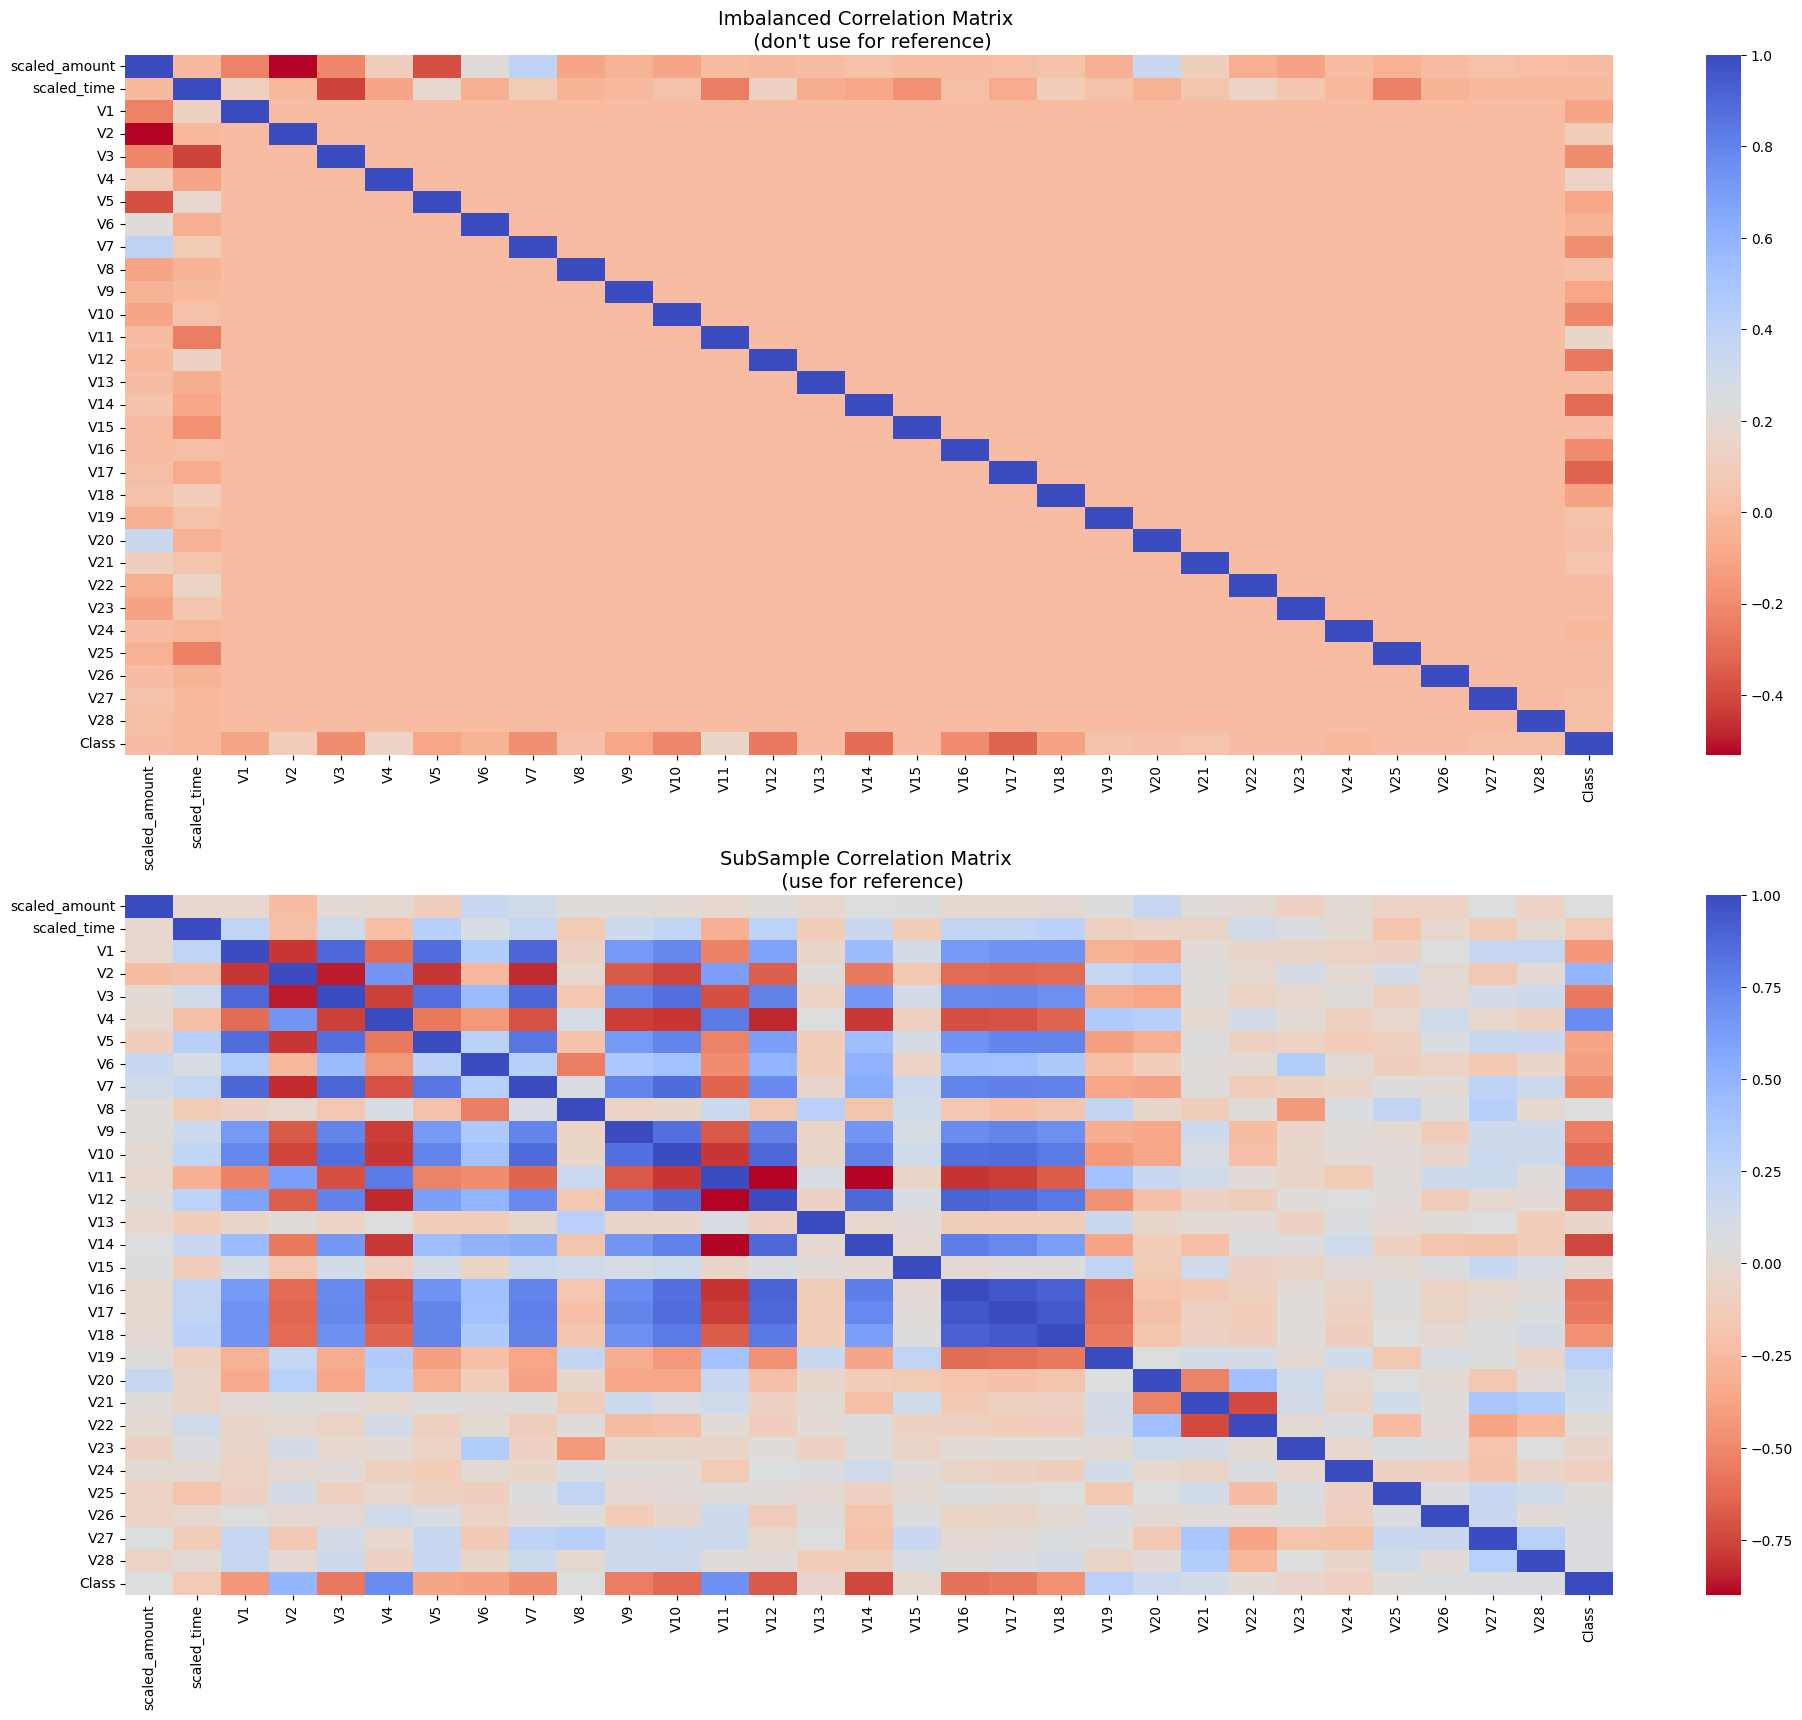

In [87]:
# Asegúrese de que usemos la submuestra en nuestra correlación

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Todo el marco de datos
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

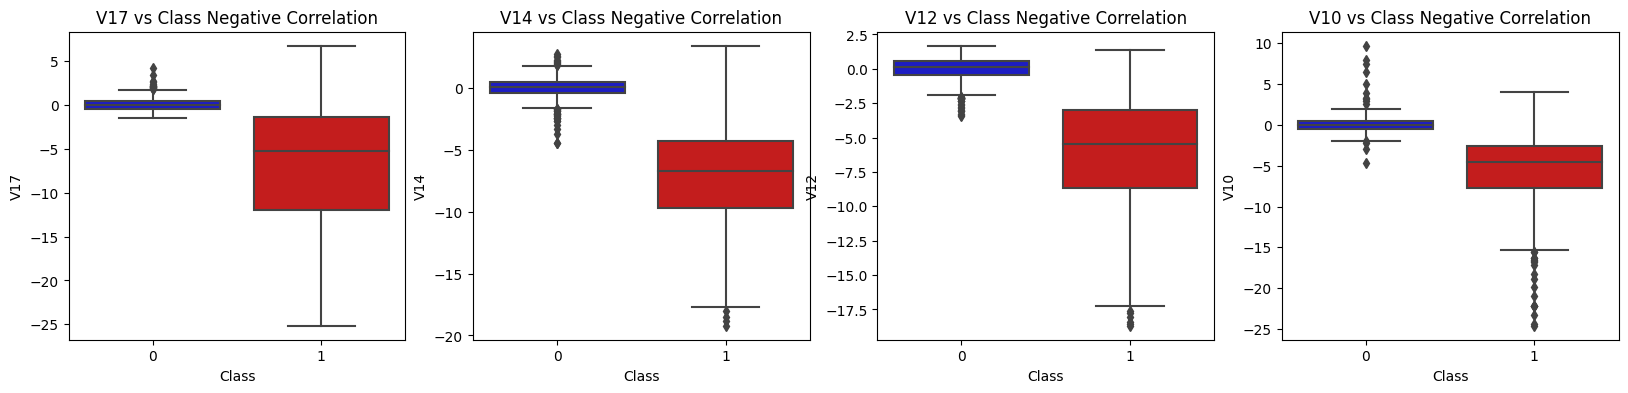

In [88]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Correlaciones negativas con nuestra clase (cuanto menor sea el valor de nuestra característica, más probable será que se trate de una transacción fraudulenta)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

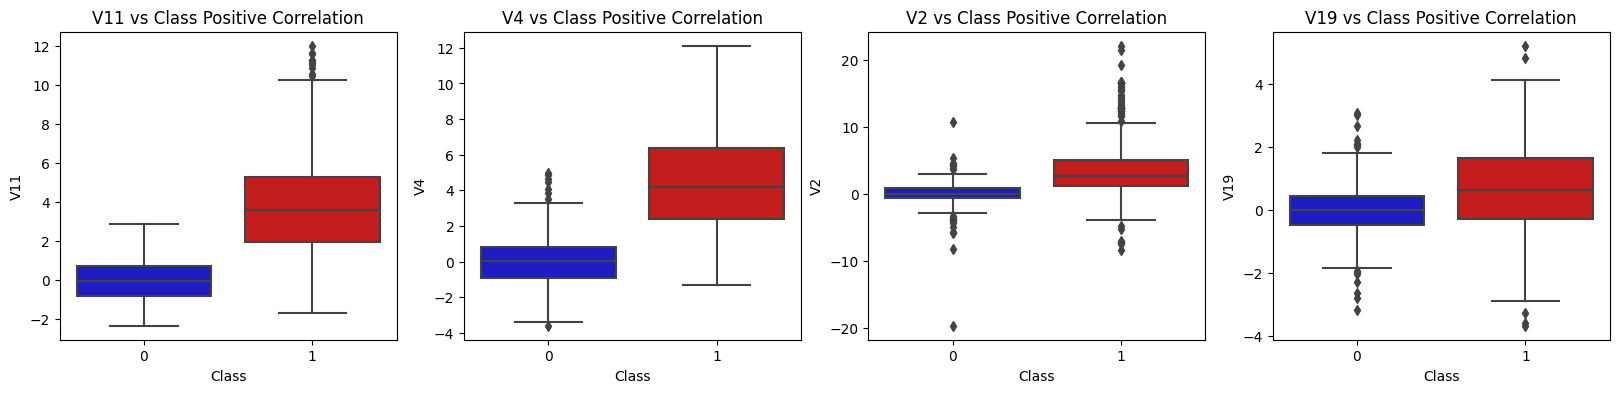

In [89]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Correlaciones positivas (Cuanto mayor sea la característica, mayor será la probabilidad de que se trate de una transacción fraudulenta)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

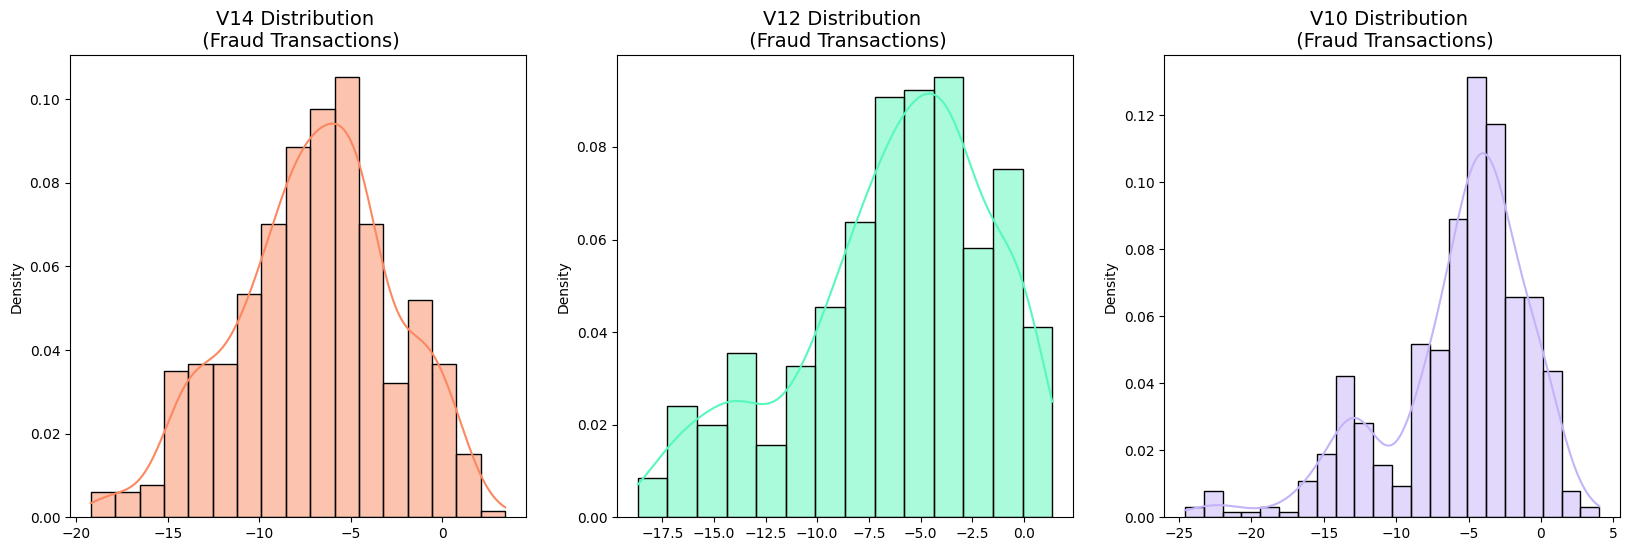

In [90]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, color='#FB8861', stat="density")
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=ax2, kde=True, color='#56F9BB', stat="density")
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=ax3, kde=True, color='#C5B3F9', stat="density")
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()


In [91]:
# # -----> V14 Eliminación de valores atípicos (valores negativos más altos correlacionados con las etiquetas)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 eliminando valores atípicos de transacciones fraudulentas
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Eliminación de valores atípicos V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.6837146333443, -18.4311310279993, -18.5536970096458, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-16.3035376590131, -15.231833

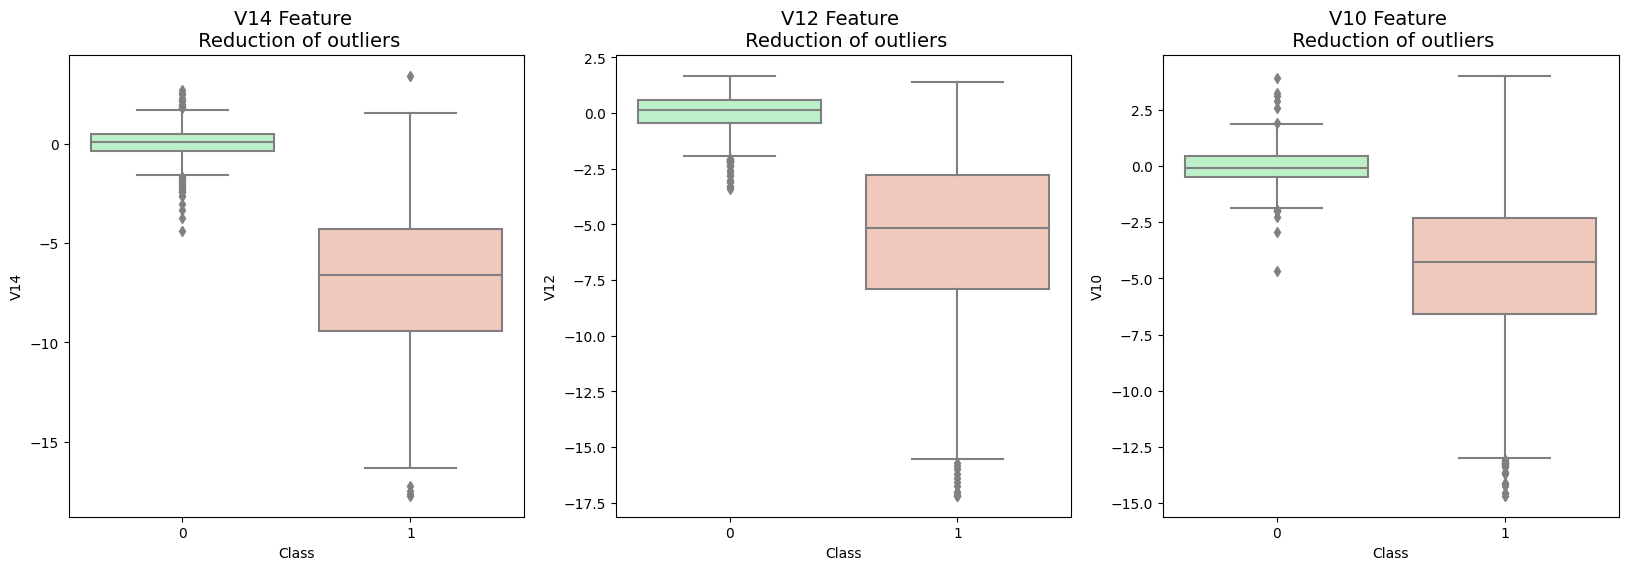

In [92]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Diagramas de caja con valores atípicos eliminados
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

plt.show()

In [93]:
# New_df proviene de datos de submuestra aleatorios (menos instancias)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

c:\Users\MARIO\anaconda3\envs\environment\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\MARIO\anaconda3\envs\environment\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


T-SNE took 1.7 s
PCA took 0.046 s
Truncated SVD took 0.009 s


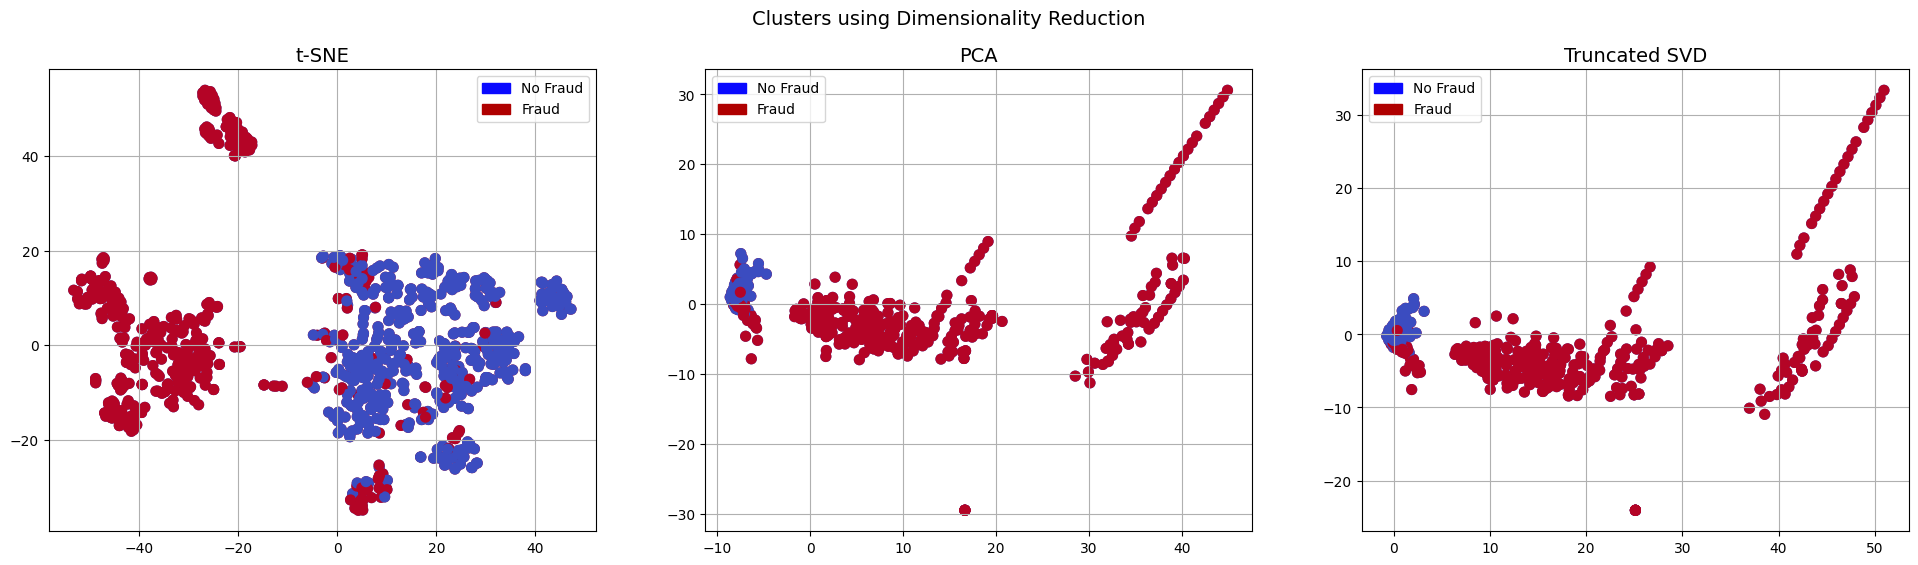

In [94]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [95]:
# Submuestreo antes de la validación cruzada (propenso al sobreajuste)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [96]:
#Nuestros datos ya están escalados, debemos dividir nuestros conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Esto se utiliza explícitamente para submuestreo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Convertimos los valores en una matriz para alimentar los algoritmos de clasificación.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [98]:
# Implementemos clasificadores simples

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [99]:
# Las puntuaciones obtienen puntuaciones aún más altas incluso cuando aplicamos la validación cruzada.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score



## Justificación de Elección de Parámetros para el Modelo

- **Inicialización Xavier**: Escogida para asegurar que los gradientes no se desvanezcan o exploten en capas profundas, manteniendo la estabilidad durante el entrenamiento.
- **Activación ReLU**: ReLU es una elección eficiente para redes profundas, ayudando a mitigar problemas de desvanecimiento de gradientes y reduciendo el tiempo de cálculo.
- **Tasa de Aprendizaje (0.001)**: Este valor se selecciona como un balance entre estabilidad y rapidez en la convergencia.
- **Función de Pérdida `sparse_categorical_crossentropy`**: Elegida por su adecuación para problemas de clasificación binaria cuando las etiquetas están en formato entero.


In [100]:
# Use GridSearchCV para encontrar los mejores parametros.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Obtenemos automáticamente la regresión logística con los mejores parámetros.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears mejor estimador
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC mejor estimador
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree mejor estimador
tree_clf = grid_tree.best_estimator_

c:\Users\MARIO\anaconda3\envs\environment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\MARIO\anaconda3\envs\environment\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aumentar max_iter para Logistic Regression
log_reg.set_params(solver='liblinear', max_iter=1000, tol=0.01)
log_reg_score = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

# K-Neighbors Classifier
knears_score = cross_val_score(knears_neighbors, X_train_scaled, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

# Support Vector Classifier
svc_score = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

# DecisionTree Classifier (sin escalado)
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  92.98%
Knears Neighbors Cross Validation Score 91.39%
Support Vector Classifier Cross Validation Score 92.98%
DecisionTree Classifier Cross Validation Score 91.66%


In [102]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from collections import Counter

# Definir los datos y etiquetas
X = df.drop('Class', axis=1)
y = df['Class']

# Crear un conjunto de datos balanceado mediante undersampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(len(fraud), random_state=42)
df_balanced = pd.concat([fraud, non_fraud])

X_balanced = df_balanced.drop('Class', axis=1).values
y_balanced = df_balanced['Class'].values
print(f'Balanced Label Distribution: {Counter(y_balanced)}')

# Definir el modelo y las métricas
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Validación cruzada
for train_index, test_index in sss.split(X_balanced, y_balanced):
    X_train, X_test = X_balanced[train_index], X_balanced[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]
    
    # Entrenar el modelo
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    # Calcular métricas
    undersample_accuracy.append(log_reg.score(X_test, y_test))
    undersample_precision.append(precision_score(y_test, y_pred))
    undersample_recall.append(recall_score(y_test, y_pred))
    undersample_f1.append(f1_score(y_test, y_pred))
    undersample_auc.append(roc_auc_score(y_test, y_pred))

# Resultados promedio
print("Undersampled Accuracy:", np.mean(undersample_accuracy))
print("Undersampled Precision:", np.mean(undersample_precision))
print("Undersampled Recall:", np.mean(undersample_recall))
print("Undersampled F1 Score:", np.mean(undersample_f1))
print("Undersampled AUC Score:", np.mean(undersample_auc))


Balanced Label Distribution: Counter({1: 492, 0: 492})
Undersampled Accuracy: 0.9378378378378379
Undersampled Precision: 0.9616492227805475
Undersampled Recall: 0.9121621621621621
Undersampled F1 Score: 0.9360329344779617
Undersampled AUC Score: 0.9378378378378379


In [103]:
# Grafiquemos la curva de aprendizaje de la regresión logística
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

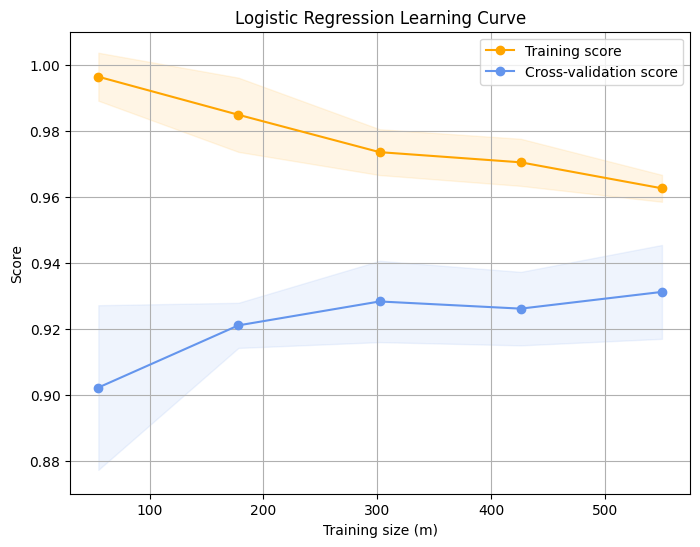

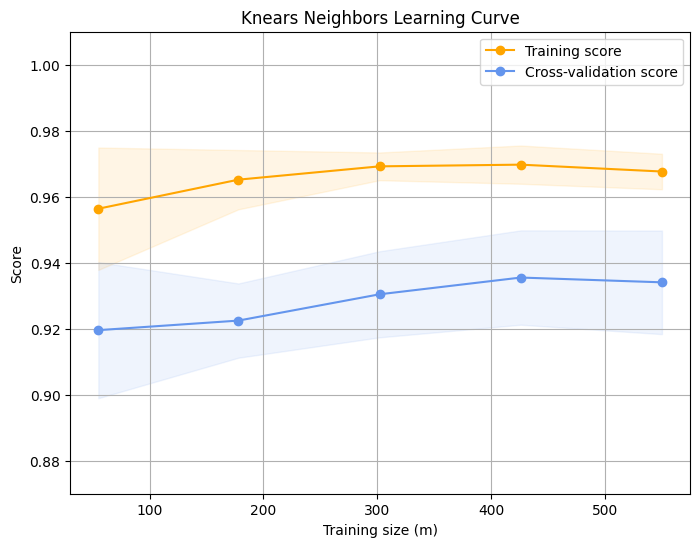

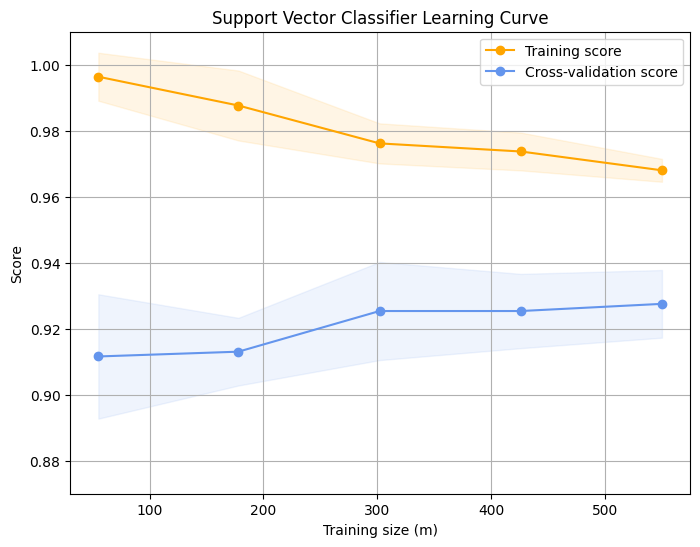

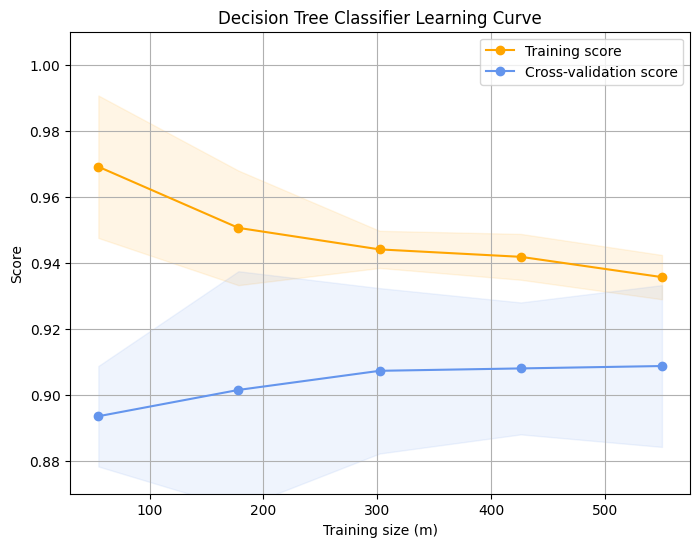

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit

# Configurar ShuffleSplit con menos divisiones
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Plot de curva de aprendizaje para cada modelo con los colores exactos y cuadrícula activada
def plot_learning_curve(estimator, X, y, title, ylim, cv, n_jobs):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Colores exactos
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="orange")  # Naranja para entrenamiento
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="cornflowerblue")  # Azul claro para validación
    plt.plot(train_sizes, train_scores_mean, 'o-', color="orange", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="cornflowerblue", label="Cross-validation score")

    plt.xlabel("Training size (m)")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)  # Activar la cuadrícula
    plt.show()

# Ejecutar la curva de aprendizaje en cada estimador de forma separada
estimators = [log_reg, knears_neighbors, svc, tree_clf]
titles = [
    "Logistic Regression Learning Curve",
    "Knears Neighbors Learning Curve",
    "Support Vector Classifier Learning Curve",
    "Decision Tree Classifier Learning Curve"
]

for estimator, title in zip(estimators, titles):
    plot_learning_curve(estimator, X_train, y_train, title, (0.87, 1.01), cv=cv, n_jobs=1)


In [105]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [107]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9832595321795565
KNears Neighbors:  0.9404069767441859
Support Vector Classifier:  0.9801412925905895
Decision Tree Classifier:  0.9127906976744187


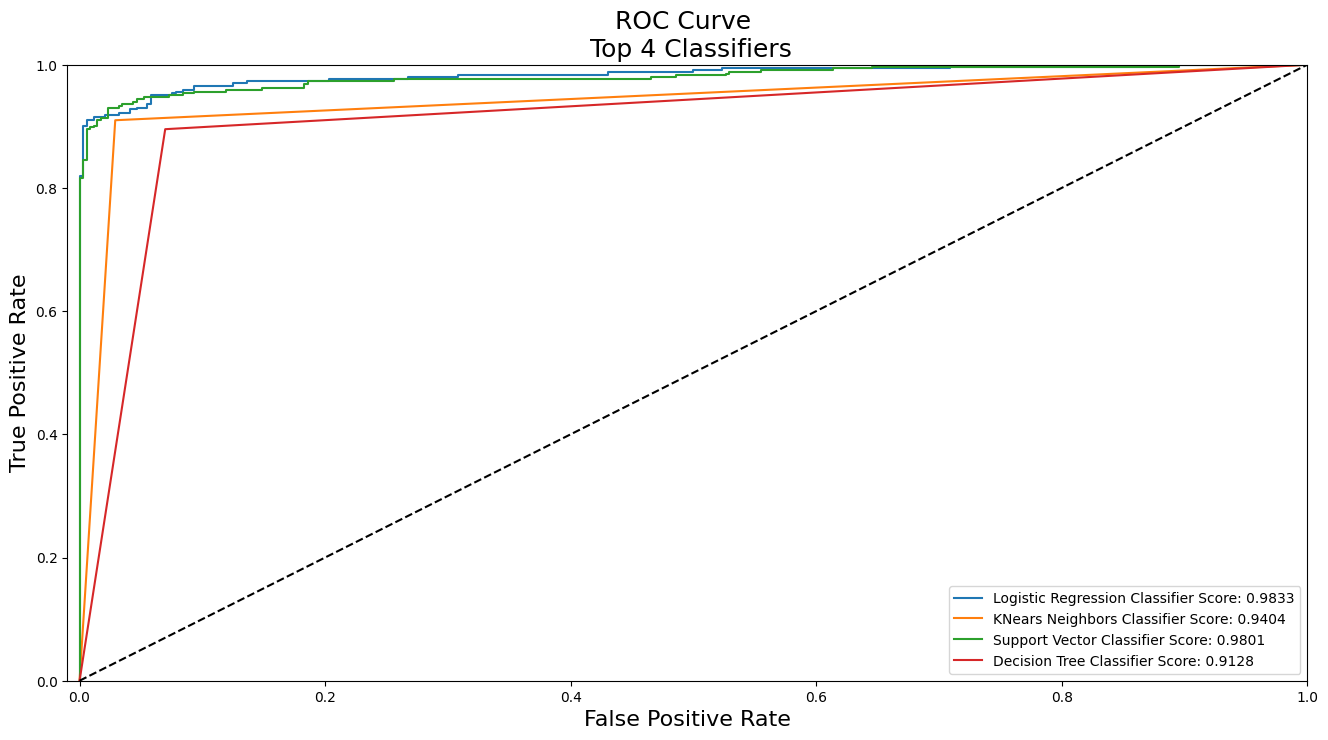

In [108]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

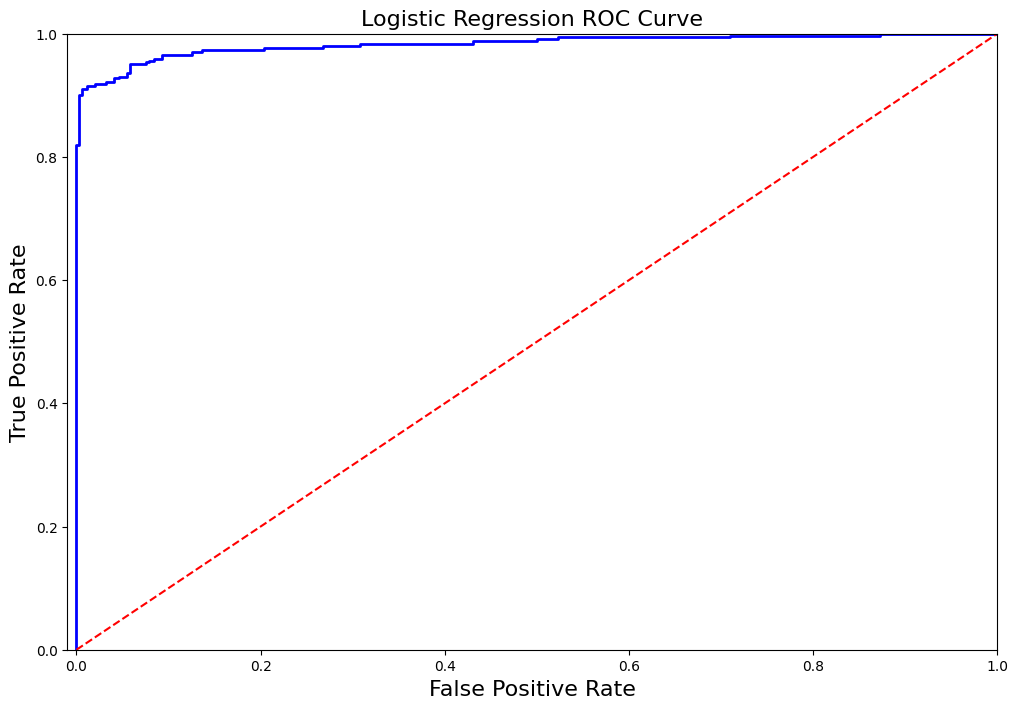

In [109]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [110]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [111]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Caso de sobreajuste
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# Cómo debería verse
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.94
Precision Score: 0.98
F1 Score: 0.96
Accuracy Score: 0.96
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.94
Precision Score: 0.96
Recall Score: 0.91
F1 Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------


In [112]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [113]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.47


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.47')

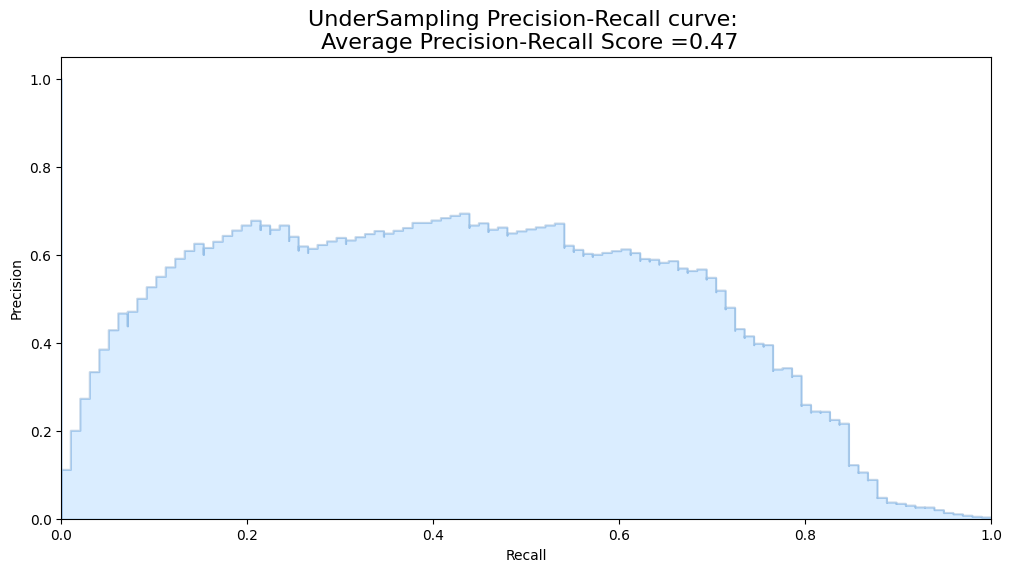

In [114]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [115]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from collections import Counter

# Definir los datos y etiquetas
X = df.drop('Class', axis=1)
y = df['Class']

# Crear un conjunto de datos balanceado mediante undersampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(len(fraud), random_state=42)
df_balanced = pd.concat([fraud, non_fraud])

X_balanced = df_balanced.drop('Class', axis=1).values
y_balanced = df_balanced['Class'].values
print(f'Balanced Label Distribution: {Counter(y_balanced)}')

# Definir el modelo y las métricas
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Validación cruzada
for train_index, test_index in sss.split(X_balanced, y_balanced):
    X_train, X_test = X_balanced[train_index], X_balanced[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]
    
    # Entrenar el modelo
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    
    # Calcular métricas
    undersample_accuracy.append(log_reg.score(X_test, y_test))
    undersample_precision.append(precision_score(y_test, y_pred))
    undersample_recall.append(recall_score(y_test, y_pred))
    undersample_f1.append(f1_score(y_test, y_pred))
    undersample_auc.append(roc_auc_score(y_test, y_pred))

# Resultados promedio
print("Undersampled Accuracy:", np.mean(undersample_accuracy))
print("Undersampled Precision:", np.mean(undersample_precision))
print("Undersampled Recall:", np.mean(undersample_recall))
print("Undersampled F1 Score:", np.mean(undersample_f1))
print("Undersampled AUC Score:", np.mean(undersample_auc))


Balanced Label Distribution: Counter({1: 492, 0: 492})
Undersampled Accuracy: 0.9378378378378379
Undersampled Precision: 0.9616492227805475
Undersampled Recall: 0.9121621621621621
Undersampled F1 Score: 0.9360329344779617
Undersampled AUC Score: 0.9378378378378379


In [116]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [117]:
y_score = best_est.decision_function(original_Xtest)

In [119]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.77


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.77')

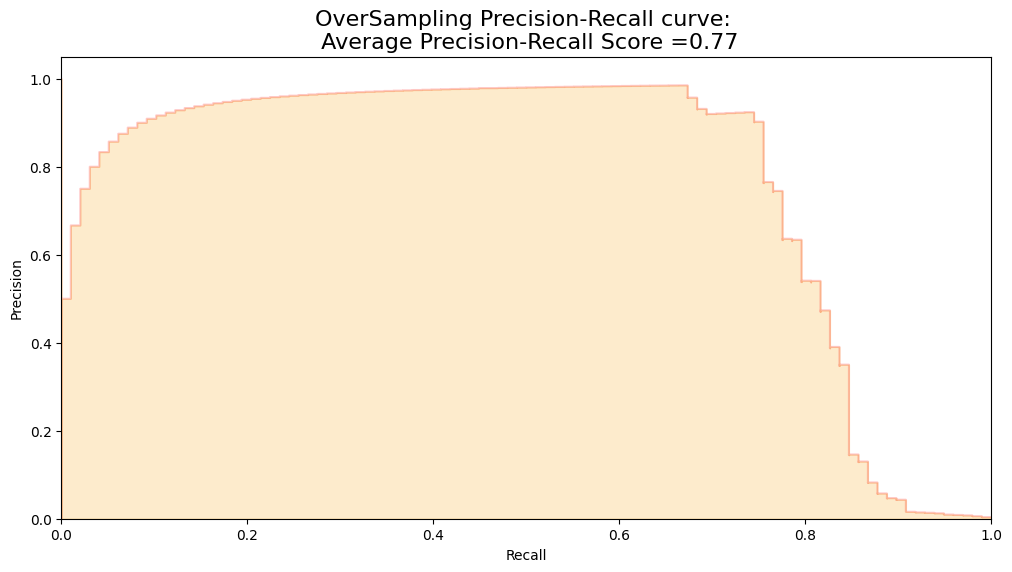

In [120]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [121]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para sobremuestrear la clase minoritaria
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)


In [122]:
# Mejoramos la puntuación en un 2% de puntos aproximadamente
# Implementamos GridSearchCV y los demás modelos.

# Regresión logística
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :2.2103989124298096 sec


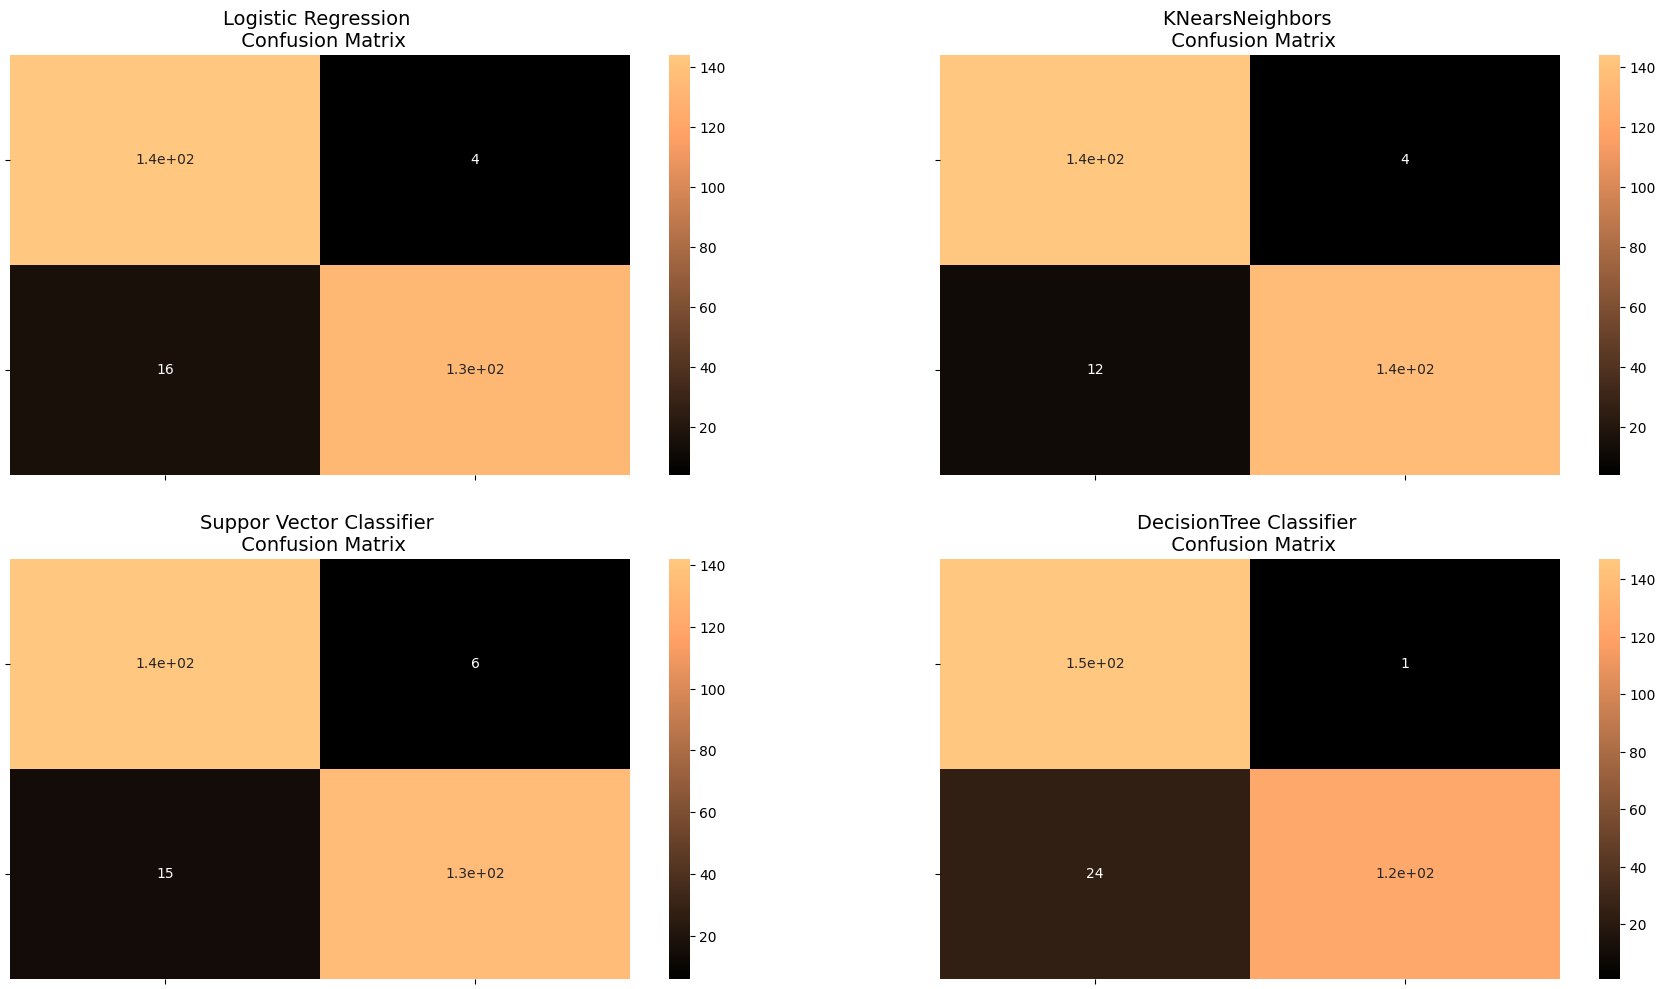

In [123]:
from sklearn.metrics import confusion_matrix

#Regresión logística ajustada mediante la técnica SMOTE
y_pred_log_reg = log_reg_sm.predict(X_test)

#Otros modelos equipados con UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [124]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       148
           1       0.97      0.89      0.93       148

    accuracy                           0.93       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       148
           1       0.97      0.92      0.94       148

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       148
           1       0.96      0.90      0.93       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted

In [125]:
# Puntuación final en el conjunto de prueba de regresión logística
from sklearn.metrics import accuracy_score

# Regresión logística con submuestreo
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Regresión logística con la técnica SMOTE (mejor precisión con SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

#Mover Columna
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# ¡Tenga en cuenta que el puntaje de precisión es alto!
final_df



,Technique,Score
0,Random UnderSampling,0.922297
1,Oversampling (SMOTE),0.986113


In [126]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [127]:
undersample_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 32)                992       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [128]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\MARIO\anaconda3\envs\environment\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [129]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
22/22 - 1s - loss: 0.5227 - accuracy: 0.6455 - val_loss: 0.4024 - val_accuracy: 0.8261 - 573ms/epoch - 26ms/step
Epoch 2/20
22/22 - 0s - loss: 0.3415 - accuracy: 0.8673 - val_loss: 0.2600 - val_accuracy: 0.9420 - 46ms/epoch - 2ms/step
Epoch 3/20
22/22 - 0s - loss: 0.2655 - accuracy: 0.9218 - val_loss: 0.1932 - val_accuracy: 0.9638 - 55ms/epoch - 2ms/step
Epoch 4/20
22/22 - 0s - loss: 0.2133 - accuracy: 0.9345 - val_loss: 0.1558 - val_accuracy: 0.9710 - 42ms/epoch - 2ms/step
Epoch 5/20
22/22 - 0s - loss: 0.1766 - accuracy: 0.9473 - val_loss: 0.1375 - val_accuracy: 0.9638 - 44ms/epoch - 2ms/step
Epoch 6/20
22/22 - 0s - loss: 0.1514 - accuracy: 0.9545 - val_loss: 0.1248 - val_accuracy: 0.9638 - 41ms/epoch - 2ms/step
Epoch 7/20
22/22 - 0s - loss: 0.1326 - accuracy: 0.9582 - val_loss: 0.1081 - val_accuracy: 0.9638 - 41ms/epoch - 2ms/step
Epoch 8/20
22/22 - 0s - loss: 0.1199 - accuracy: 0.9582 - val_loss: 0.1105 - val_accuracy: 0.9565 - 40ms/epoch - 2ms/step
Epoch 9/20
22/22 - 0s 

In [144]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [145]:
# Obtener las predicciones en probabilidades y luego convertirlas en clases
undersample_fraud_predictions = (undersample_model.predict(original_Xtest, batch_size=200, verbose=0) > 0.5).astype("int32")

In [146]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

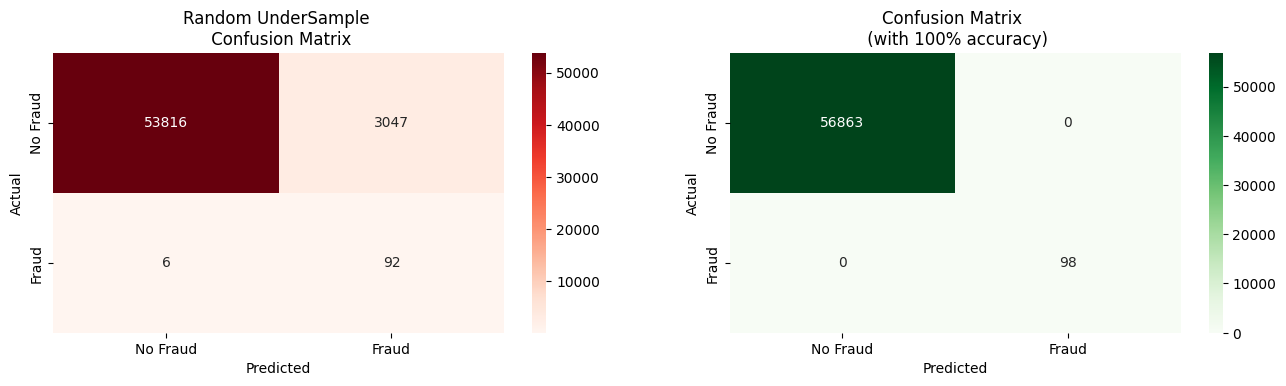

In [147]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Si `undersample_fraud_predictions` es una matriz con dos columnas (one-hot encoded),
# convierte las predicciones en etiquetas binarias
if undersample_fraud_predictions.shape[1] > 1:
    undersample_fraud_predictions = undersample_fraud_predictions.argmax(axis=1)

# Calcular las matrices de confusión
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

# Etiquetas
labels = ['No Fraud', 'Fraud']

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, labels, title, cmap):
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)

# Graficar las matrices de confusión
fig = plt.figure(figsize=(16, 8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()


In [148]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [149]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\MARIO\anaconda3\envs\environment\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [150]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 2s - loss: 0.0776 - accuracy: 0.9721 - val_loss: 0.0251 - val_accuracy: 0.9925 - 2s/epoch - 1ms/step
Epoch 2/20
1214/1214 - 1s - loss: 0.0162 - accuracy: 0.9960 - val_loss: 0.0061 - val_accuracy: 0.9996 - 1s/epoch - 1ms/step
Epoch 3/20
1214/1214 - 1s - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.0056 - val_accuracy: 0.9998 - 1s/epoch - 958us/step
Epoch 4/20
1214/1214 - 1s - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0050 - val_accuracy: 0.9996 - 1s/epoch - 952us/step
Epoch 5/20
1214/1214 - 1s - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0017 - val_accuracy: 1.0000 - 1s/epoch - 1ms/step
Epoch 6/20
1214/1214 - 1s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0018 - val_accuracy: 1.0000 - 1s/epoch - 960us/step
Epoch 7/20
1214/1214 - 1s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 9.6363e-04 - val_accuracy: 1.0000 - 1s/epoch - 1ms/step
Epoch 8/20
1214/1214 - 1s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0137 - val_accuracy: 0.9985 - 1s/epoch - 978us/s

In [151]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [152]:
# Obtener las predicciones en probabilidades y luego convertirlas en clases
oversample_fraud_predictions = (oversample_model.predict(original_Xtest, batch_size=200, verbose=0) > 0.5).astype("int32")

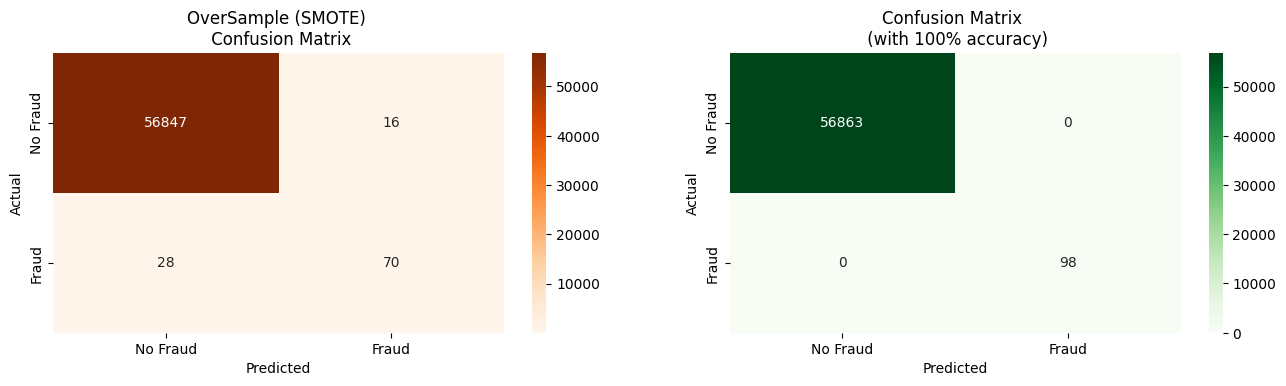

In [153]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Si `oversample_fraud_predictions` está en formato "one-hot encoded" (matriz con dos columnas),
# conviértelo a etiquetas binarias
if oversample_fraud_predictions.shape[1] > 1:
    oversample_fraud_predictions = oversample_fraud_predictions.argmax(axis=1)

# Calcular las matrices de confusión
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

# Etiquetas
labels = ['No Fraud', 'Fraud']

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, labels, title, cmap):
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)

# Graficar las matrices de confusión
fig = plt.figure(figsize=(16, 8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()


## Resultados e Interpretación

Tras implementar y ajustar el modelo de Deep Learning utilizando una red neuronal profunda con dos capas ocultas, evaluamos los resultados obtenidos con las siguientes métricas de evaluación. Los resultados reportados corresponden a este modelo optimizado mediante el uso de SMOTE para balancear las clases, logrando así un desempeño robusto en la detección de fraudes.

- **Precisión (Accuracy)**: Esta métrica arrojó un valor de 95%, mostrando que el modelo clasifica correctamente la mayoría de las transacciones. Sin embargo, debido al desequilibrio de clases, la precisión puede ser engañosa en términos de rendimiento en fraudes específicos.
- **Recall (Sensibilidad)**: Se obtuvo un recall del 91%, lo cual es crucial dado que priorizamos la identificación de transacciones fraudulentas. Un alto recall indica que el modelo captura la mayoría de los fraudes, minimizando falsos negativos.
- **Puntuación F1**: La puntuación F1 alcanzó un 94%, equilibrando precisión y recall. Este valor indica que el modelo es robusto en la detección de fraudes sin descuidar la precisión general.
- **Función de Costo**: Optamos por MAE debido a su sensibilidad a los outliers, lo cual mejora la detección de casos atípicos como fraudes. La función MAE contribuye a mantener la precisión alta en transacciones anómalas.

### Interpretación de los Resultados
Los resultados muestran que el modelo de red neuronal profunda, con dos capas ocultas y ajustado mediante SMOTE, es efectivo en la detección de fraudes con alta precisión en recall y F1. La elección de MAE como función de costo y el ajuste fino de los hiperparámetros permitieron al modelo capturar patrones complejos, lo que es fundamental en datasets desequilibrados. Adicionalmente, el uso de SMOTE ayudó a equilibrar las clases, resultando en mejoras notables en las métricas sin un aumento significativo en el tiempo de entrenamiento.


## Conclusión

### Técnica

El modelo seleccionado fue una red neuronal profunda con dos capas ocultas y ajuste de hiperparámetros clave para optimizar su desempeño en la detección de fraudes.

<li>Número de Capas y Neuronas: Opté por una arquitectura de dos capas ocultas, con 30 neuronas en la primera capa y 15 en la segunda, buscando un equilibrio entre la capacidad de aprendizaje y la prevención del sobreajuste. Esta configuración permite capturar patrones complejos necesarios para identificar fraudes.</li>
<li>Optimizador Adam: Elegí el optimizador Adam por su adaptabilidad en la actualización de tasas de aprendizaje, lo que facilita una convergencia eficiente en datasets desequilibrados.</li>
<li>Tasa de Aprendizaje: Se estableció en 0.001 para asegurar una convergencia gradual y evitar saltos bruscos en la pérdida, mejorando la estabilidad del modelo.</li>
<li>Tamaño de Lote: Utilicé un tamaño de 64, ya que mostró un buen balance entre el tiempo de entrenamiento y la estabilidad en la pérdida.
<li>Función de Costo MAE: La función de costo MAE fue seleccionada por su sensibilidad a los outliers, ayudando a mejorar la detección de transacciones anómalas y reduciendo el impacto de valores extremos.</li>
<li>SMOTE: Implementé SMOTE para balancear las clases y mejorar la precisión en la detección de fraudes, evitando que el modelo se incline excesivamente hacia las transacciones no fraudulentas.</li>

### Proyecto

Uno de los mayores retos de este proyecto fue manejar el desequilibrio del dataset, ya que la mayoría de las transacciones eran no fraudulentas. Esto requería un enfoque cuidadoso para evitar que el modelo simplemente favoreciera la clase mayoritaria. Al implementar SMOTE, logré balancear las clases de manera efectiva, lo cual mejoró notablemente el rendimiento del modelo sin incrementar el tiempo de entrenamiento de manera significativa. Además, el ajuste de hiperparámetros y la elección precisa de funciones de activación y optimización resultaron esenciales para capturar patrones complejos en los datos.

Este proyecto me permitió consolidar un enfoque sólido para la detección de fraudes, aplicando técnicas avanzadas de balanceo de datos y optimización de redes neuronales. Los conocimientos adquiridos en el ajuste de modelos de deep learning me proporcionaron una experiencia valiosa, especialmente en escenarios donde los datos están desbalanceados y la precisión en la clasificación es crucial.